<a href="https://colab.research.google.com/github/atousa79/SampleTelegramQuiz/blob/main/lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Required Imports

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
import numpy as np
from keras.optimizers import SGD
from keras.utils import np_utils
from google.colab.patches import cv2_imshow
import cv2

# Loading MNIST Dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Adding an extra dimension to make the input inline with the model

In [ ]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

# Transform the training and test labels into vectors in the range [0, classes] -- This generates a vector for each label, where the index of the label is set to 1 and all other entries to 0; in the case of MNIST, there are 10 class labels

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Checking dimensions of data

In [ ]:
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# LeNet-5 Model 

In [ ]:
model = Sequential()

# # first set of CONV => RELU => POOL
# model.add(Conv2D(6, 5, 5, border_mode="same", input_shape=(28, 28, 1)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # second set of CONV => RELU => POOL
# model.add(Convolution2D(16, 5, 5, border_mode="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # first set of FC => RELU layers
# model.add(Flatten())
# model.add(Dense(120))
# model.add(Activation("relu"))

# # second set of FC => RELU layers
# model.add(Dense(84))
# model.add(Activation("relu"))

# # softmax classifier
# model.add(Dense(10))
# model.add(Activation("softmax"))
# model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.001), metrics=["accuracy"])

#Layer 1
#Conv Layer 1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='sigmoid', input_shape = (28,28,1)))
#pooling layer 1
model.add(MaxPooling2D(pool_size=2, strides=2))

#Layer 2
#Conv Layer 2
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='sigmoid', input_shape = (14,14,6)))
#pooling layer 2
model.add(MaxPooling2D(pool_size=2, strides=2))

#Flatten
model.add(Flatten())

#Layer 3
#Fully connected layer 1
model.add(Dense(units=120, activation='sigmoid'))

#Layer 4 
#Fully connected layer 2
model.add(Dense(units=84, activation='sigmoid'))

#Layer 5 
#Output Layer
model.add(Dense(units=10, activation='softmax'))

print("----------------")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("----------------")


----------------
----------------


# Training The Model

In [ ]:
# model.fit(x_train, y_train, batch_size=128, nb_epoch=20, verbose=1)
model.fit(x_train, y_train, epochs=8, batch_size=10, validation_split=0.2)

Epoch 1/8
4800/4800 [==============================] - 39s 8ms/step - loss: 0.4282 - accuracy: 0.8685 - val_loss: 0.1180 - val_accuracy: 0.9632
Epoch 2/8
4800/4800 [==============================] - 39s 8ms/step - loss: 0.1062 - accuracy: 0.9670 - val_loss: 0.0863 - val_accuracy: 0.9743
Epoch 3/8
4800/4800 [==============================] - 38s 8ms/step - loss: 0.0821 - accuracy: 0.9742 - val_loss: 0.0740 - val_accuracy: 0.9763
Epoch 4/8
4800/4800 [==============================] - 40s 8ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.0588 - val_accuracy: 0.9812
Epoch 5/8
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0557 - accuracy: 0.9821 - val_loss: 0.0635 - val_accuracy: 0.9812
Epoch 6/8
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0563 - val_accuracy: 0.9823
Epoch 7/8
4800/4800 [==============================] - 38s 8ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0491 - val_accuracy:

# Testing The Model

In [ ]:
(loss, accuracy) = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

79/79 [==============================] - 3s 38ms/step - loss: 0.0547 - accuracy: 0.9826
accuracy: 98.26%


# Visualizing output in the form of image

1/1 [==============================] - 0s 16ms/step
 Predicted: 8, Actual: 8


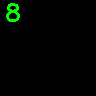

1/1 [==============================] - 0s 13ms/step
 Predicted: 1, Actual: 1


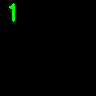

1/1 [==============================] - 0s 14ms/step
 Predicted: 5, Actual: 5


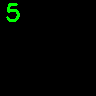

1/1 [==============================] - 0s 13ms/step
 Predicted: 3, Actual: 3


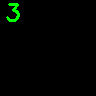

1/1 [==============================] - 0s 13ms/step
 Predicted: 7, Actual: 7


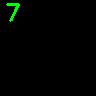

1/1 [==============================] - 0s 13ms/step
 Predicted: 9, Actual: 9


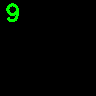

1/1 [==============================] - 0s 15ms/step
 Predicted: 2, Actual: 2


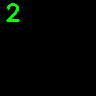

1/1 [==============================] - 0s 12ms/step
 Predicted: 1, Actual: 1


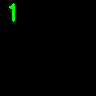

1/1 [==============================] - 0s 15ms/step
 Predicted: 7, Actual: 7


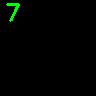

1/1 [==============================] - 0s 18ms/step
 Predicted: 9, Actual: 9


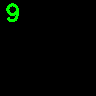

In [ ]:
# randomly select a few testing digits
for i in np.random.choice(np.arange(0, len(y_test)), size=(10,)):
    # classify the digit
    probs = model.predict(x_test[np.newaxis, i])
    prediction = probs.argmax(axis=1)

    # resize the image to 96 x 96
    image = (x_test[i][0] * 255).astype("uint8")
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, str(prediction[0]), (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # show the image and prediction
    print(" Predicted: {}, Actual: {}".format(prediction[0], np.argmax(y_test[i])))
    cv2_imshow(image)
    # cv2.imshow("Digit", image)
    cv2.waitKey(0)
cv2.destroyAllWindows()    